In [232]:
from os import listdir
from os.path import isfile, join


data_catalog = "..//..//Realtime-Emotion-Detection-master//video_emotions_recognized//"
data_files = [f for f in listdir(data_catalog) if isfile(join(data_catalog, f))]

In [233]:
data_files

['oleg_s.csv', 'julia_s.csv', 'dasha_f.csv', 'nastya_k.csv', 'katya_v.csv']

In [234]:
import pandas as pd
import numpy as np


file_counter = 1

df_1 = pd.read_csv(data_catalog + data_files[0], sep = "\t", names = ["number", "emotion"])
df_2 = pd.read_csv(data_catalog + data_files[1], sep = "\t", names = ["number", "emotion"])
df_3 = pd.read_csv(data_catalog + data_files[2], sep = "\t", names = ["number", "emotion"])
df_4 = pd.read_csv(data_catalog + data_files[3], sep = "\t", names = ["number", "emotion"])
df_5 = pd.read_csv(data_catalog + data_files[4], sep = "\t", names = ["number", "emotion"])

#df_1 = df_1[df_1["number"] <= 34000].to_dict()
#df_2 = df_2[df_2["number"] <= 34000].to_dict()
#df_3 = df_3[df_3["number"] <= 34000].to_dict()
#df_4 = df_4[df_4["number"] <= 34000].to_dict()
#df_5 = df_5[df_5["number"] <= 34000].to_dict()

In [196]:
# calculate base emotion
df_1["emotion"].value_counts()
df_2["emotion"].value_counts()
df_3["emotion"].value_counts()
df_4["emotion"].value_counts()
df_5["emotion"].value_counts()

happy      30141
neutral     1502
fear         103
Name: emotion, dtype: int64

In [235]:
base_emotion_1 = "happy"
base_emotion_2 = "neutral"
base_emotion_3 = "happy"
base_emotion_4 = "happy"
base_emotion_5 = "happy"

In [236]:
# find deviations from base emotion
deviations_1 = df_1[(pd.notnull(df_1.emotion)) & (df_1.emotion != base_emotion_1)]["number"]
deviations_2 = df_2[(pd.notnull(df_2.emotion)) & (df_2.emotion != base_emotion_2)]["number"]
deviations_3 = df_3[(pd.notnull(df_3.emotion)) & (df_3.emotion != base_emotion_3)]["number"]
deviations_4 = df_4[(pd.notnull(df_4.emotion)) & (df_4.emotion != base_emotion_4)]["number"]
deviations_5 = df_5[(pd.notnull(df_5.emotion)) & (df_5.emotion != base_emotion_5)]["number"]

deviations_1 = list(deviations_1.values)
deviations_2 = list(deviations_2.values)
deviations_3 = list(deviations_3.values)
deviations_4 = list(deviations_4.values)
deviations_5 = list(deviations_5.values)

In [254]:
# 1 человек
# Смотрим на изменения в эмоциях у других людей, которые заразились от 1го человека

with_exitment_1 = pd.DataFrame(columns = ["reciever_id", "reciever_name", "emotion_recieved", "sender_id", 
                                          "sender_name", "emotion_sent"])

sender_name = "oleg_s"

for number in deviations_1:
    
    temp_dataset_2 = df_2[(df_2.number >= number) & (df_2.number <= number + 100) & 
               (df_2.emotion != base_emotion_2) & (pd.notnull(df_2.emotion))]
    temp_dataset_2["reciever_id"] = temp_dataset_2["number"]
    temp_dataset_2["reciever_name"] = "julia_s"
    temp_dataset_2["emotion_recieved"] = temp_dataset_2["emotion"]
    temp_dataset_2["sender_id"] = number
    temp_dataset_2["sender_name"] = sender_name
    temp_dataset_2["emotion_sent"] = df_1.loc[number - 1, "emotion"]
    
    temp_dataset_3 = df_3[(df_3.number >= number) & (df_3.number <= number + 100) & 
               (df_3.emotion != base_emotion_3) & (pd.notnull(df_3.emotion))]
    temp_dataset_3["reciever_id"] = temp_dataset_3["number"]
    temp_dataset_3["reciever_name"] = "dasha_f"
    temp_dataset_3["emotion_recieved"] = temp_dataset_3["emotion"]
    temp_dataset_3["sender_id"] = number
    temp_dataset_3["sender_name"] = sender_name
    temp_dataset_3["emotion_sent"] = df_1.loc[number - 1, "emotion"]
    
    temp_dataset_4 = df_4[(df_4.number >= number) & (df_4.number <= number + 100) & 
               (df_4.emotion != base_emotion_4) & (pd.notnull(df_4.emotion))]
    temp_dataset_4["reciever_id"] = temp_dataset_4["number"]
    temp_dataset_4["reciever_name"] = "nastya_k"
    temp_dataset_4["emotion_recieved"] = temp_dataset_4["emotion"]
    temp_dataset_4["sender_id"] = number
    temp_dataset_4["sender_name"] = sender_name
    temp_dataset_4["emotion_sent"] = df_1.loc[number - 1, "emotion"]
    
    temp_dataset_5 = df_5[(df_5.number >= number) & (df_5.number <= number + 100) & 
               (df_5.emotion != base_emotion_5) & (pd.notnull(df_5.emotion))]
    temp_dataset_5["reciever_id"] = temp_dataset_5["number"]
    temp_dataset_5["reciever_name"] = "katya_v"
    temp_dataset_5["emotion_recieved"] = temp_dataset_5["emotion"]
    temp_dataset_5["sender_id"] = number
    temp_dataset_5["sender_name"] = sender_name
    temp_dataset_5["emotion_sent"] = df_1.loc[number - 1, "emotion"]
    
    if len(temp_dataset_2) != 0:
        with_exitment_1 = pd.concat([with_exitment_1, temp_dataset_2], ignore_index = True)
    
    if len(temp_dataset_3) != 0:
        with_exitment_1 = pd.concat([with_exitment_1, temp_dataset_3], ignore_index = True)
        
    if len(temp_dataset_4) != 0:
        with_exitment_1 = pd.concat([with_exitment_1, temp_dataset_4], ignore_index = True)
        
    if len(temp_dataset_5) != 0:
        with_exitment_1 = pd.concat([with_exitment_1, temp_dataset_5], ignore_index = True)

with_exitment_1 = with_exitment_1[["reciever_id", "reciever_name", "emotion_recieved", "sender_id", "sender_name", 
                                   "emotion_sent"]]

/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [255]:
# 2 человек
# Смотрим на изменения в эмоциях у других людей, которые заразились от 2го человека

with_exitment_2 = pd.DataFrame(columns = ["reciever_id", "reciever_name", "emotion_recieved", "sender_id", 
                                          "sender_name", "emotion_sent"])

for number in deviations_2:
    
    sender_name = "julia_s"
    
    temp_dataset_1 = df_1[(df_1.number >= number) & (df_1.number <= number + 100) & 
               (df_1.emotion != base_emotion_1) & (pd.notnull(df_1.emotion))]
    temp_dataset_1["reciever_id"] = temp_dataset_1["number"]
    temp_dataset_1["reciever_name"] = "oleg_s"
    temp_dataset_1["emotion_recieved"] = temp_dataset_1["emotion"]
    temp_dataset_1["sender_id"] = number
    temp_dataset_1["sender_name"] = sender_name
    temp_dataset_1["emotion_sent"] = df_2.loc[number - 1, "emotion"]
    
    temp_dataset_3 = df_3[(df_3.number >= number) & (df_3.number <= number + 100) & 
               (df_3.emotion != base_emotion_3) & (pd.notnull(df_3.emotion))]
    temp_dataset_3["reciever_id"] = temp_dataset_3["number"]
    temp_dataset_3["reciever_name"] = "dasha_f"
    temp_dataset_3["emotion_recieved"] = temp_dataset_3["emotion"]
    temp_dataset_3["sender_id"] = number
    temp_dataset_3["sender_name"] = sender_name
    temp_dataset_3["emotion_sent"] = df_2.loc[number - 1, "emotion"]
    
    temp_dataset_4 = df_4[(df_4.number >= number) & (df_4.number <= number + 100) & 
               (df_4.emotion != base_emotion_4) & (pd.notnull(df_4.emotion))]
    temp_dataset_4["reciever_id"] = temp_dataset_4["number"]
    temp_dataset_4["reciever_name"] = "nastya_k"
    temp_dataset_4["emotion_recieved"] = temp_dataset_4["emotion"]
    temp_dataset_4["sender_id"] = number
    temp_dataset_4["sender_name"] = sender_name
    temp_dataset_4["emotion_sent"] = df_2.loc[number - 1, "emotion"]
    
    temp_dataset_5 = df_5[(df_5.number >= number) & (df_5.number <= number + 100) & 
               (df_5.emotion != base_emotion_5) & (pd.notnull(df_5.emotion))]
    temp_dataset_5["reciever_id"] = temp_dataset_5["number"]
    temp_dataset_5["reciever_name"] = "katya_v"
    temp_dataset_5["emotion_recieved"] = temp_dataset_5["emotion"]
    temp_dataset_5["sender_id"] = number
    temp_dataset_5["sender_name"] = sender_name
    temp_dataset_5["emotion_sent"] = df_2.loc[number - 1, "emotion"]
    
    if len(temp_dataset_1) != 0:
        with_exitment_2 = pd.concat([with_exitment_2, temp_dataset_1], ignore_index = True)
    
    if len(temp_dataset_3) != 0:
        with_exitment_2 = pd.concat([with_exitment_2, temp_dataset_3], ignore_index = True)
        
    if len(temp_dataset_4) != 0:
        with_exitment_2 = pd.concat([with_exitment_2, temp_dataset_4], ignore_index = True)
        
    if len(temp_dataset_5) != 0:
        with_exitment_2 = pd.concat([with_exitment_2, temp_dataset_5], ignore_index = True)

with_exitment_2 = with_exitment_2[["reciever_id", "reciever_name", "emotion_recieved", "sender_id", "sender_name", 
                                   "emotion_sent"]]

/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [256]:
# 3 человек
# Смотрим на изменения в эмоциях у других людей, которые заразились от 3го человека

with_exitment_3 = pd.DataFrame(columns = ["reciever_id", "reciever_name", "emotion_recieved", "sender_id", 
                                          "sender_name", "emotion_sent"])

for number in deviations_3:
    
    sender_name = "dasha_f"
    
    temp_dataset_1 = df_1[(df_1.number >= number) & (df_1.number <= number + 100) & 
               (df_1.emotion != base_emotion_1) & (pd.notnull(df_1.emotion))]
    temp_dataset_1["reciever_id"] = temp_dataset_1["number"]
    temp_dataset_1["reciever_name"] = "oleg_s"
    temp_dataset_1["emotion_recieved"] = temp_dataset_1["emotion"]
    temp_dataset_1["sender_id"] = number
    temp_dataset_1["sender_name"] = sender_name
    temp_dataset_1["emotion_sent"] = df_3.loc[number - 1, "emotion"]
    
    temp_dataset_2 = df_2[(df_2.number >= number) & (df_2.number <= number + 100) & 
               (df_2.emotion != base_emotion_2) & (pd.notnull(df_2.emotion))]
    temp_dataset_2["reciever_id"] = temp_dataset_2["number"]
    temp_dataset_2["reciever_name"] = "julia_s"
    temp_dataset_2["emotion_recieved"] = temp_dataset_2["emotion"]
    temp_dataset_2["sender_id"] = number
    temp_dataset_2["sender_name"] = sender_name
    temp_dataset_2["emotion_sent"] = df_3.loc[number - 1, "emotion"]
    
    temp_dataset_4 = df_4[(df_4.number >= number) & (df_4.number <= number + 100) & 
               (df_4.emotion != base_emotion_4) & (pd.notnull(df_4.emotion))]
    temp_dataset_4["reciever_id"] = temp_dataset_4["number"]
    temp_dataset_4["reciever_name"] = "nastya_k"
    temp_dataset_4["emotion_recieved"] = temp_dataset_4["emotion"]
    temp_dataset_4["sender_id"] = number
    temp_dataset_4["sender_name"] = sender_name
    temp_dataset_4["emotion_sent"] = df_3.loc[number - 1, "emotion"]
    
    temp_dataset_5 = df_5[(df_5.number >= number) & (df_5.number <= number + 100) & 
               (df_5.emotion != base_emotion_5) & (pd.notnull(df_5.emotion))]
    temp_dataset_5["reciever_id"] = temp_dataset_5["number"]
    temp_dataset_5["reciever_name"] = "katya_v"
    temp_dataset_5["emotion_recieved"] = temp_dataset_5["emotion"]
    temp_dataset_5["sender_id"] = number
    temp_dataset_5["sender_name"] = sender_name
    temp_dataset_5["emotion_sent"] = df_3.loc[number - 1, "emotion"]
    
    if len(temp_dataset_1) != 0:
        with_exitment_3 = pd.concat([with_exitment_3, temp_dataset_1], ignore_index = True)
    
    if len(temp_dataset_2) != 0:
        with_exitment_3 = pd.concat([with_exitment_3, temp_dataset_2], ignore_index = True)
        
    if len(temp_dataset_4) != 0:
        with_exitment_3 = pd.concat([with_exitment_3, temp_dataset_4], ignore_index = True)
        
    if len(temp_dataset_5) != 0:
        with_exitment_3 = pd.concat([with_exitment_3, temp_dataset_5], ignore_index = True)
        
with_exitment_3 = with_exitment_3[["reciever_id", "reciever_name", "emotion_recieved", "sender_id", "sender_name", 
                                   "emotion_sent"]]

/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [257]:
# 4 человек
# Смотрим на изменения в эмоциях у других людей, которые заразились от 4го человека

with_exitment_4 = pd.DataFrame(columns = ["reciever_id", "reciever_name", "emotion_recieved", "sender_id", 
                                          "sender_name", "emotion_sent"])

for number in deviations_4:
    
    sender_name = "nastya_k"
    
    temp_dataset_1 = df_1[(df_1.number >= number) & (df_1.number <= number + 100) & 
               (df_1.emotion != base_emotion_1) & (pd.notnull(df_1.emotion))]
    temp_dataset_1["reciever_id"] = temp_dataset_1["number"]
    temp_dataset_1["reciever_name"] = "oleg_s"
    temp_dataset_1["emotion_recieved"] = temp_dataset_1["emotion"]
    temp_dataset_1["sender_id"] = number
    temp_dataset_1["sender_name"] = sender_name
    temp_dataset_1["emotion_sent"] = df_4.loc[number - 1, "emotion"]
    
    temp_dataset_2 = df_2[(df_2.number >= number) & (df_2.number <= number + 100) & 
               (df_2.emotion != base_emotion_2) & (pd.notnull(df_2.emotion))]
    temp_dataset_2["reciever_id"] = temp_dataset_2["number"]
    temp_dataset_2["reciever_name"] = "julia_s"
    temp_dataset_2["emotion_recieved"] = temp_dataset_2["emotion"]
    temp_dataset_2["sender_id"] = number
    temp_dataset_2["sender_name"] = sender_name
    temp_dataset_2["emotion_sent"] = df_4.loc[number - 1, "emotion"]
    
    temp_dataset_3 = df_3[(df_3.number >= number) & (df_3.number <= number + 100) & 
               (df_3.emotion != base_emotion_3) & (pd.notnull(df_3.emotion))]
    temp_dataset_3["reciever_id"] = temp_dataset_3["number"]
    temp_dataset_3["reciever_name"] = "dasha_f"
    temp_dataset_3["emotion_recieved"] = temp_dataset_3["emotion"]
    temp_dataset_3["sender_id"] = number
    temp_dataset_3["sender_name"] = sender_name
    temp_dataset_3["emotion_sent"] = df_4.loc[number - 1, "emotion"]
    
    temp_dataset_5 = df_5[(df_5.number >= number) & (df_5.number <= number + 100) & 
               (df_5.emotion != base_emotion_5) & (pd.notnull(df_5.emotion))]
    temp_dataset_5["reciever_id"] = temp_dataset_5["number"]
    temp_dataset_5["reciever_name"] = "katya_v"
    temp_dataset_5["emotion_recieved"] = temp_dataset_5["emotion"]
    temp_dataset_5["sender_id"] = number
    temp_dataset_5["sender_name"] = sender_name
    temp_dataset_5["emotion_sent"] = df_4.loc[number - 1, "emotion"]
    
    if len(temp_dataset_1) != 0:
        with_exitment_4 = pd.concat([with_exitment_4, temp_dataset_1], ignore_index = True)
    
    if len(temp_dataset_2) != 0:
        with_exitment_4 = pd.concat([with_exitment_4, temp_dataset_2], ignore_index = True)
        
    if len(temp_dataset_3) != 0:
        with_exitment_4 = pd.concat([with_exitment_4, temp_dataset_3], ignore_index = True)
        
    if len(temp_dataset_5) != 0:
        with_exitment_4 = pd.concat([with_exitment_4, temp_dataset_5], ignore_index = True)
        
with_exitment_4 = with_exitment_4[["reciever_id", "reciever_name", "emotion_recieved", "sender_id", "sender_name", 
                                   "emotion_sent"]]

/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [258]:
# 5 человек
# Смотрим на изменения в эмоциях у других людей, которые заразились от 5го человека

with_exitment_5 = pd.DataFrame(columns = ["reciever_id", "reciever_name", "emotion_recieved", "sender_id", 
                                          "sender_name", "emotion_sent"])

for number in deviations_5:
    
    sender_name = "katya_v"
    
    temp_dataset_1 = df_1[(df_1.number >= number) & (df_1.number <= number + 100) & 
               (df_1.emotion != base_emotion_1) & (pd.notnull(df_1.emotion))]
    temp_dataset_1["reciever_id"] = temp_dataset_1["number"]
    temp_dataset_1["reciever_name"] = "oleg_s"
    temp_dataset_1["emotion_recieved"] = temp_dataset_1["emotion"]
    temp_dataset_1["sender_id"] = number
    temp_dataset_1["sender_name"] = sender_name
    temp_dataset_1["emotion_sent"] = df_5.loc[number - 1, "emotion"]
    
    temp_dataset_2 = df_2[(df_2.number >= number) & (df_2.number <= number + 100) & 
               (df_2.emotion != base_emotion_2) & (pd.notnull(df_2.emotion))]
    temp_dataset_2["reciever_id"] = temp_dataset_2["number"]
    temp_dataset_2["reciever_name"] = "julia_s"
    temp_dataset_2["emotion_recieved"] = temp_dataset_2["emotion"]
    temp_dataset_2["sender_id"] = number
    temp_dataset_2["sender_name"] = sender_name
    temp_dataset_2["emotion_sent"] = df_5.loc[number - 1, "emotion"]
    
    temp_dataset_3 = df_3[(df_3.number >= number) & (df_3.number <= number + 100) & 
               (df_3.emotion != base_emotion_3) & (pd.notnull(df_3.emotion))]
    temp_dataset_3["reciever_id"] = temp_dataset_3["number"]
    temp_dataset_3["reciever_name"] = "dasha_f"
    temp_dataset_3["emotion_recieved"] = temp_dataset_3["emotion"]
    temp_dataset_3["sender_id"] = number
    temp_dataset_3["sender_name"] = sender_name
    temp_dataset_3["emotion_sent"] = df_5.loc[number - 1, "emotion"]
    
    temp_dataset_4 = df_4[(df_4.number >= number) & (df_4.number <= number + 100) & 
               (df_4.emotion != base_emotion_4) & (pd.notnull(df_4.emotion))]
    temp_dataset_4["reciever_id"] = temp_dataset_4["number"]
    temp_dataset_4["reciever_name"] = "nastya_k"
    temp_dataset_4["emotion_recieved"] = temp_dataset_4["emotion"]
    temp_dataset_4["sender_id"] = number
    temp_dataset_4["sender_name"] = sender_name
    temp_dataset_4["emotion_sent"] = df_5.loc[number - 1, "emotion"]
    
    if len(temp_dataset_1) != 0:
        with_exitment_5 = pd.concat([with_exitment_5, temp_dataset_1], ignore_index = True)
    
    if len(temp_dataset_2) != 0:
        with_exitment_5 = pd.concat([with_exitment_5, temp_dataset_2], ignore_index = True)
        
    if len(temp_dataset_3) != 0:
        with_exitment_5 = pd.concat([with_exitment_5, temp_dataset_3], ignore_index = True)
        
    if len(temp_dataset_4) != 0:
        with_exitment_5 = pd.concat([with_exitment_5, temp_dataset_4], ignore_index = True)
    
with_exitment_5 = with_exitment_5[["reciever_id", "reciever_name", "emotion_recieved", "sender_id", "sender_name", 
                                   "emotion_sent"]]

/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/a17508629/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [362]:
union_table = pd.concat([with_exitment_1, with_exitment_2, with_exitment_3, with_exitment_4, with_exitment_5], 
          sort = True, ignore_index = True)

# для построения гистограмы нужно числовое поле
union_table["reciever_id"] = union_table["reciever_id"].astype(int)
union_table["sender_id"] = union_table["sender_id"].astype(int)

# удалить дубликаты (по reciever_id)
union_table["emotion_sent_semantic"] = union_table["emotion_sent"].map({"neutral": "positive", 
                                                                        "fear": "negative", 
                                                                        "surprise": "positive",
                                                                        "happy": "positive", 
                                                                        "sad": "negative"})

union_table["emotion_recieved_semantic"] = union_table["emotion_recieved"].map({"neutral": "positive", 
                                                                        "fear": "negative", 
                                                                        "surprise": "positive",
                                                                        "happy": "positive", 
                                                                        "sad": "negative"})

# удаляем дубликаты
distinct_union_table = union_table.drop_duplicates(subset = ["sender_name", "reciever_name", "sender_id"], 
                                                   keep = "last")

distinct_union_table = distinct_union_table[distinct_union_table.emotion_recieved_semantic == distinct_union_table.emotion_sent_semantic]

In [329]:
# считаем 
count_transfer = distinct_union_table[distinct_union_table.emotion_recieved_semantic != distinct_union_table.emotion_sent_semantic]
count_nontransfer = distinct_union_table[distinct_union_table.emotion_recieved_semantic == distinct_union_table.emotion_sent_semantic]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x18548cb10>,
      dtype=object)

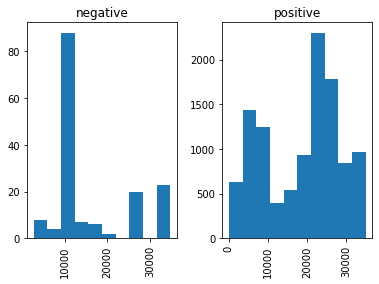

In [364]:
distinct_union_table[["reciever_id", "emotion_recieved_semantic"]].hist(by = "emotion_recieved_semantic")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x185ab6b90>,
      dtype=object)

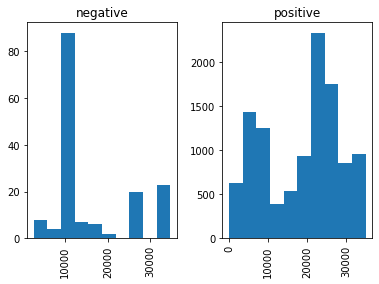

In [365]:
distinct_union_table[["sender_id", "emotion_sent_semantic"]].hist(by = "emotion_sent_semantic")

In [366]:
# количество заражение по человеку и по позитивности
count_by_sender = distinct_union_table.groupby(["sender_name", "emotion_sent_semantic"]).count()

In [367]:
count_by_sender

emotion_recieved  emotion_sent  \
sender_name emotion_sent_semantic                                   
dasha_f     negative                            127           127   
            positive                           5941          5941   
julia_s     positive                            900           900   
katya_v     negative                              8             8   
            positive                           2216          2216   
nastya_k    negative                             16            16   
            positive                            579           579   
oleg_s      negative                              7             7   
            positive                           1426          1426   

                                   reciever_id  reciever_name  sender_id  \
sender_name emotion_sent_semantic                                          
dasha_f     negative                       127            127        127   
            positive                      5941           5941       5941   
julia_s     positive                       900            900        900   
katya_v     negative                         8              8          8   
            positive                      2216           2216       2216   
nastya_k    negative                        16             16         16   
            positive                       579            579        579   
oleg_s      negative                         7              7          7   
            positive                      1426           1426       1426   

                                   emotion_recieved_semantic  
sender_name emotion_sent_semantic                             
dasha_f     negative                                     127  
            positive                                    5941  
julia_s     positive                                     900  
katya_v     negative                                       8  
            positive                                    2216  
nastya_k    negative                                      16  
            positive                                     579  
oleg_s      negative                                       7  
            positive                                    1426

### With base emotion

In [ ]:
df